# 선형종속인 경우

예측모형을 만들기 위한 특징행렬 X의 열벡터들이 선형종속이거나 선형종속에 가까운 현상을 다중공선성이라고 부른다. 다중공선성이 발생하면 예측의 성능이 나빠지므로 되도록 이러한 경우가 발생하지 않도록 주의해야 한다.

경우 1 : 벡터의 개수가 벡터의 차원보다 크면 선형종속이다

경우 2: 값이 같은 벡터가 있으면 반드시 선형종속이다.

경우 3: 어떤 벡터가 다른 벡터의 선형조합이면 반드시 선형종속이다.

# 랭크

행렬의 열벡터 중 서로 독립인 열벡터의 최대 개수를 **열랭크(column rank)**라고 하고 행벡터 중 서로 독립인 행벡터의 최대 개수를 **행랭크(row rank)**라고 한다. 행랭크와 열랭크에 대해서는 다음 정리가 성립한다.

행랭크과 열랭크는 항상 같다.

In [1]:
import numpy as np

In [2]:
X1 = np.array([[1, 3], [2, 4]])
np.linalg.matrix_rank(X1)

2

In [3]:
X2 = np.array([[1, 3, 5], [2, 3, 7]])
np.linalg.matrix_rank(X2)

2

# 좌표

어떤 벡터의 **좌표(coordinate)**는 기저벡터를 선형조합하여 그 벡터를 나타내기 위한 계수벡터를 말한다

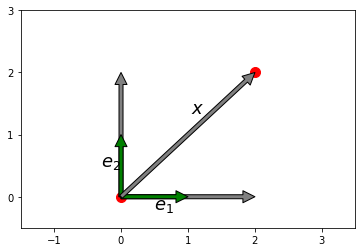

In [4]:
import matplotlib.pylab as plt

gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}
lightgreen = {"facecolor": "lightgreen"}
e1 = np.array([1, 0])
e2 = np.array([0, 1])
x = np.array([2, 2])

plt.annotate('', xy=2 * e1, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=2 * e2, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=e1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=e2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=x, xytext=(0, 0), arrowprops=gray)

plt.plot(0, 0, 'ro', ms=10)
plt.plot(x[0], x[1], 'ro', ms=10)

plt.text(1.05, 1.35, "$x$", fontdict={"size": 18})
plt.text(-0.3, 0.5, "$e_2$", fontdict={"size": 18})
plt.text(0.5, -0.2, "$e_1$", fontdict={"size": 18})

plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.5, 3.5)
plt.ylim(-0.5, 3)
plt.show()

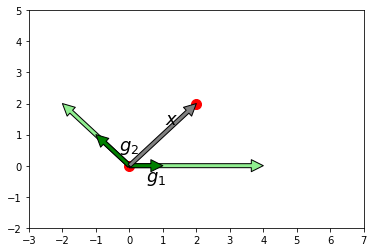

In [5]:
g1 = np.array([1, 0])
g2 = np.array([-1, 1])
x = np.array([2, 2])

plt.annotate('', xy=4 * g1, xytext=(0, 0), arrowprops=lightgreen)
plt.annotate('', xy=2 * g2, xytext=(0, 0), arrowprops=lightgreen)
plt.annotate('', xy=g1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=g2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=x, xytext=(0, 0), arrowprops=gray)

plt.plot(0, 0, 'ro', ms=10)
plt.plot(x[0], x[1], 'ro', ms=10)

plt.text(1.05, 1.35, "$x$", fontdict={"size": 18})
plt.text(-0.3, 0.5, "$g_2$", fontdict={"size": 18})
plt.text(0.5, -0.5, "$g_1$", fontdict={"size": 18})

plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-10, 10))
plt.xlim(-3, 7)
plt.ylim(-2, 5)
plt.show()

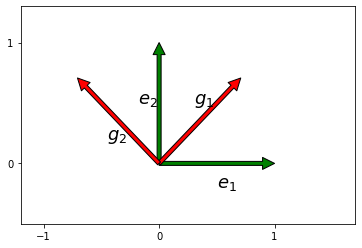

In [6]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])
a = np.array([2, 2])
g1 = np.array([1, 1]) / np.sqrt(2)
g2 = np.array([-1, 1]) / np.sqrt(2)

plt.annotate('', xy=e1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=e2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=g1, xytext=(0, 0), arrowprops=red)
plt.annotate('', xy=g2, xytext=(0, 0), arrowprops=red)

plt.text(-0.18, 0.5, "$e_2$", fontdict={"size": 18})
plt.text(0.5, -0.2, "$e_1$", fontdict={"size": 18})
plt.text(0.3, 0.5, "$g_1$", fontdict={"size": 18})
plt.text(-0.45, 0.2, "$g_2$", fontdict={"size": 18})

plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.2, 1.7)
plt.ylim(-0.5, 1.3)
plt.show()

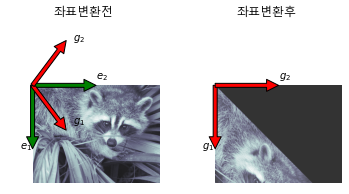

In [9]:
import scipy as sp
import scipy.misc
import scipy.ndimage
import matplotlib as mpl

plt.rc("font", size=10, family='Malgun Gothic') 
f = sp.misc.face(gray=True)

e1 = np.array([0, 1]) # matplotlib의 이미지 좌표규약으로 부호변경 
e2 = np.array([1, 0])
E = np.vstack([e1, e2]).T
g1 = np.array([1, 0.75]) / np.sqrt(2)
g2 = np.array([-1, 0.75]) / np.sqrt(2)
A = np.vstack([g1, g2]).T
gc1 = E @ g1
gc2 = E @ g2

plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone, alpha=0.9)
plt.annotate('', xy=500*e1, xytext=(0,0), arrowprops=green)
plt.annotate('$e_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0), arrowprops=green)
plt.annotate('$e_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.annotate('', xy=500*gc1, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_1$', xy=500*gc1, xytext=500*gc1 + [50, -50])
plt.annotate('', xy=500*gc2, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_2$', xy=500*gc2, xytext=500*gc2 + [50, 0])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환전")

f1 = sp.ndimage.affine_transform(f, A)

plt.subplot(122)
plt.imshow(f1, cmap=mpl.cm.bone, alpha=0.8)
plt.annotate('', xy=500*e1, xytext=(0,0), arrowprops=red)
plt.annotate('$g_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0), arrowprops=red)
plt.annotate('$g_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환후")
plt.show()